# Regression analysis: WMG & GDP per capita

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
path = r'/Users/alexbor/Desktop/Data Analytics/Immersion/Submissions/6. Advanced Analytics/Project_Waste in the world'

In [4]:
#Import dataframes

df_all = pd.read_csv(os.path.join(path,'Prepared data','Complete_Dataset_without_0_emissions_with_extreme_outliers.csv'), index_col = False)


# Data cleaning

In [5]:
df_all.head()

,Unnamed: 0.1,Unnamed: 0,Country,Year,Type of emissions,Gas type,"Emissions quantity, tonnes","Total population, thousands",Population density,GDP per capita,WMG,Emissions by year & country,GDP per cap. category,Country category by emissions
0,0,0,Aruba,2017,solid-waste-disposal,ch4,487.0,105.0,585.769,29329.0,NaN,55031.0,High GDP per cap.,Low emissions country
1,1,1,Aruba,2017,solid-waste-disposal,co2e_100yr,13636.0,105.0,585.769,29329.0,NaN,55031.0,High GDP per cap.,Low emissions country
2,2,2,Aruba,2017,solid-waste-disposal,co2e_20yr,40908.0,105.0,585.769,29329.0,NaN,55031.0,High GDP per cap.,Low emissions country
3,3,3,Aruba,2018,solid-waste-disposal,co2e_20yr,41244.0,105.0,588.675,30220.0,NaN,55483.0,High GDP per cap.,Low emissions country
4,4,4,Afganistan,2015,solid-waste-disposal,ch4,21000.0,NaN,NaN,NaN,NaN,2373000.0,NaN,Insignificant emissions country


In [6]:
#Deleting column 'Unnnamed: 0'

df_all = df_all.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])


In [7]:
#Missing values
df_all.isnull().sum()

Country                             0
Year                                0
Type of emissions                   0
Gas type                            0
Emissions quantity, tonnes          0
Total population, thousands       126
Population density                126
GDP per capita                    420
WMG                              2997
Emissions by year & country         0
GDP per cap. category             420
Country category by emissions       0
dtype: int64

In [8]:
df_all.dropna(subset=['WMG'], inplace=True)


In [9]:
df_all.dropna(subset=['GDP per capita'], inplace=True)


### Hypothesis: If the GDP per capita in a country grows (independent variable), then the Waste Management Index grows as well (dependent variable). 

# Data prep for regression analysis

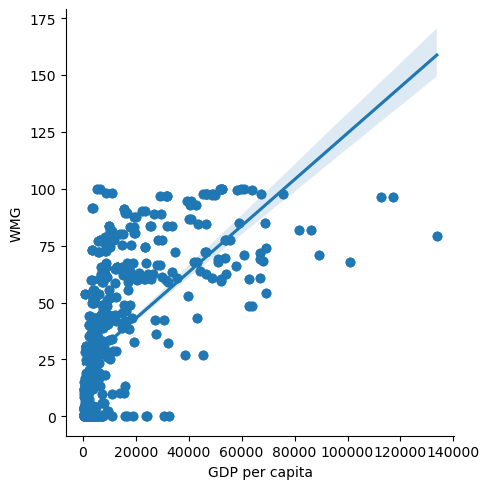

In [10]:
#WMG & GDP per capita
sns.lmplot(x = 'GDP per capita', y = 'WMG', data = df_all)

In [11]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_all['GDP per capita'].values.reshape(-1,1)
y = df_all['WMG'].values.reshape(-1,1)

In [12]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression analysis

In [13]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [14]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

In [16]:
X

array([[6396.],
       [4505.],
       [4505.],
       ...,
       [2274.],
       [2274.],
       [2274.]])

In [17]:
y

array([[13.4],
       [ 0. ],
       [ 0. ],
       ...,
       [12.9],
       [12.9],
       [12.9]])

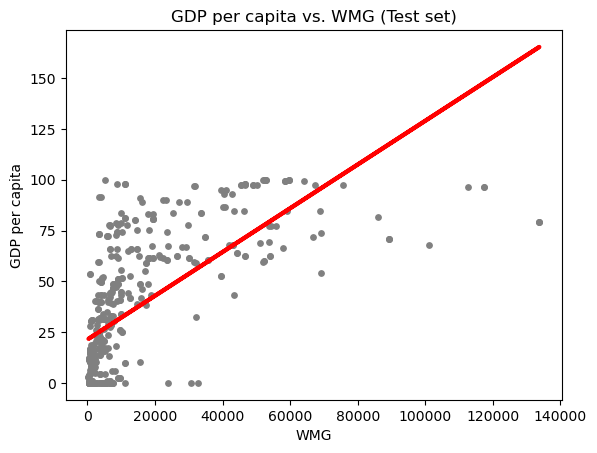

In [23]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per capita vs. WMG (Test set)')
plot_test.xlabel('WMG')
plot_test.ylabel('GDP per capita')
plot_test.show()

In [24]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [25]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00107672]]
Mean squared error:  624.0696928307365
R2 score:  0.3927899465526745


In [26]:
y_predicted

array([[ 25.54894723],
       [ 73.96388673],
       [ 28.89110162],
       [ 32.51751141],
       [ 30.66231424],
       [ 42.39430981],
       [ 31.78533842],
       [ 93.84669053],
       [ 70.26748982],
       [ 39.90276817],
       [ 28.74574375],
       [ 25.19578143],
       [ 22.25309202],
       [ 29.27118555],
       [ 29.45638225],
       [ 67.69734725],
       [ 22.97880466],
       [ 38.17354782],
       [ 25.08164858],
       [ 29.5446737 ],
       [ 85.7260306 ],
       [ 22.53734741],
       [ 23.59684481],
       [ 21.98498749],
       [ 22.63532939],
       [ 22.10127379],
       [ 77.3394196 ],
       [ 93.30402113],
       [ 25.12148741],
       [ 95.8483223 ],
       [ 28.55731687],
       [ 95.79340932],
       [ 30.99286882],
       [ 46.46756048],
       [ 34.13044546],
       [ 52.72548616],
       [ 27.41383493],
       [ 31.04347489],
       [102.87933653],
       [ 22.93358221],
       [ 25.21731593],
       [ 32.12127661],
       [ 23.01218314],
       [ 35

In [27]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,49.8,25.548947
1,97.2,73.963887
2,32.9,28.891102
3,25.0,32.517511
4,40.3,30.662314
5,61.4,42.394310
6,2.2,31.785338
7,97.6,93.846691
8,97.6,70.267490
9,59.0,39.902768


**The line goes only through some of the data points. The slope indicates a positive relationship, the RMSE is quite large and the R2 is 0.39, which is not strong enough to indicate a strong causative relationship. Hence, the model is not promising.**